**Feature Selection**: RF and Chi Squared Revisited -> with pandas
------------------

In [2]:
import pandas as pd
import pyspark
import numpy as np
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

In [3]:
df = pd.read_json('./df_labelled_coalesce.json', lines=True)

In [4]:
df['TP_Binary'] = df.TP_Label!='0'

In [5]:
df.TP_Binary.unique()

array([False,  True])

In [109]:
# Pandas output to json creates a bigger file that causes my kernel to crash on reload.
#df.to_json('./df_TP_Binary.json')

In [6]:
colName = 'EventID'

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
x = pd.get_dummies(df[colName])

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42,
						   max_depth = 30)


rf.fit(x, df.TP_Binary)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
rfi = pd.DataFrame(list(zip(rf.feature_importances_,x.columns)),
                   columns=['importance', colName])

In [20]:
rfi.sort_values('importance', ascending=False).head(20)

,importance,EventID
57,0.829773,4103
11,0.035353,12
9,0.033548,10
12,0.018251,13
72,0.012022,4658
6,0.010894,7
76,0.010019,4663
84,0.007128,4690
70,0.006562,4656
45,0.006382,800


In [21]:
c2i = pd.DataFrame(list(zip(chi2(x, df.TP_Binary)[1],x.columns)),
                   columns=['probability', colName])

In [22]:
c2i.sort_values('probability', ascending=True).head(20)

,probability,EventID
57,0.000000e+00,4103
11,6.050097e-230,12
9,2.108551e-152,10
6,8.997044e-78,7
12,2.491794e-64,13
72,6.549415e-44,4658
110,4.450441e-32,5145
70,7.839717e-23,4656
84,9.878382e-23,4690
76,3.251865e-22,4663


In [23]:
from sklearn.linear_model.logistic import LogisticRegression

lr = LogisticRegression()
lr.fit(x, df.TP_Binary)

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lri = pd.DataFrame(list(zip(lr.coef_[0], x.columns)),
                   columns=['coef', colName])

In [25]:
lri['coef_abs'] = lri.coef.abs()

In [26]:
lri.sort_values('coef_abs', ascending=False).head(20)

,coef,EventID,coef_abs
57,6.027801,4103,6.027801
110,4.351354,5145,4.351354
0,3.252657,1,3.252657
82,3.125430,4688,3.125430
9,-3.108962,10,3.108962
58,2.754523,4104,2.754523
72,-2.186635,4658,2.186635
11,-1.919571,12,1.919571
6,-1.821199,7,1.821199
21,1.743758,23,1.743758


In [27]:
colName = 'Channel'

In [28]:
x = pd.get_dummies(df[colName])

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42,
						   max_depth = 30)


rf.fit(x, df.TP_Binary)

rfi = pd.DataFrame(list(zip(rf.feature_importances_,x.columns)),
                   columns=['importance', colName])

rfi.sort_values('importance', ascending=False).head(20)

,importance,Channel
1,0.804941,Microsoft-Windows-PowerShell/Operational
2,0.096542,Microsoft-Windows-Sysmon/Operational
10,0.054763,security
7,0.029262,Security
9,0.013875,Windows PowerShell
5,0.000242,Microsoft-Windows-WMI-Activity/Operational
8,0.000227,System
4,0.000079,Microsoft-Windows-TerminalServices-RemoteConnectionManager/Operational
3,0.000034,Microsoft-Windows-TerminalServices-LocalSessionManager/Operational
6,0.000032,Microsoft-Windows-Windows Firewall With Advanced Security/Firewall


In [29]:
c2i = pd.DataFrame(list(zip(chi2(x, df.TP_Binary)[1],x.columns)),
                   columns=['probability', colName])
c2i.sort_values('probability', ascending=True).head(20)

,probability,Channel
1,0.000000e+00,Microsoft-Windows-PowerShell/Operational
2,0.000000e+00,Microsoft-Windows-Sysmon/Operational
7,8.860336e-90,Security
10,7.491915e-49,security
9,5.163780e-22,Windows PowerShell
8,2.056547e-01,System
5,2.081635e-01,Microsoft-Windows-WMI-Activity/Operational
4,6.073679e-01,Microsoft-Windows-TerminalServices-RemoteConnectionManager/Operational
6,6.748187e-01,Microsoft-Windows-Windows Firewall With Advanced Security/Firewall
3,6.906197e-01,Microsoft-Windows-TerminalServices-LocalSessionManager/Operational


In [30]:
from sklearn.linear_model.logistic import LogisticRegression

lr = LogisticRegression()
lr.fit(x, df.TP_Binary)

lri = pd.DataFrame(list(zip(lr.coef_[0], x.columns)),
                   columns=['coef', colName])

lri['coef_abs'] = lri.coef.abs()
lri.sort_values('coef_abs', ascending=False).head(20)

,coef,Channel,coef_abs
1,5.752134,Microsoft-Windows-PowerShell/Operational,5.752134
10,-2.109059,security,2.109059
9,-1.803022,Windows PowerShell,1.803022
2,-1.322964,Microsoft-Windows-Sysmon/Operational,1.322964
8,-0.159667,System,0.159667
5,-0.158323,Microsoft-Windows-WMI-Activity/Operational,0.158323
7,-0.126954,Security,0.126954
4,-0.033106,Microsoft-Windows-TerminalServices-RemoteConnectionManager/Operational,0.033106
6,-0.022469,Microsoft-Windows-Windows Firewall With Advanced Security/Firewall,0.022469
3,-0.020295,Microsoft-Windows-TerminalServices-LocalSessionManager/Operational,0.020295


In [31]:
colName = 'SourceName'

In [32]:
x = pd.get_dummies(df[colName])

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42,
						   max_depth = 30)


rf.fit(x, df.TP_Binary)

rfi = pd.DataFrame(list(zip(rf.feature_importances_,x.columns)),
                   columns=['importance', colName])

rfi.sort_values('importance', ascending=False).head(20)

,importance,SourceName
17,0.714968,Microsoft-Windows-PowerShell
19,0.162618,Microsoft-Windows-Sysmon
18,0.070895,Microsoft-Windows-Security-Auditing
28,0.048550,PowerShell
23,0.001374,Microsoft-Windows-WMI-Activity
29,0.000319,Service Control Manager
13,0.000174,Microsoft-Windows-Kernel-General
9,0.000166,Microsoft-Windows-FilterManager
21,0.000156,Microsoft-Windows-TerminalServices-RemoteConnectionManager
25,0.000150,Microsoft-Windows-Windows Firewall With Advanced Security


In [33]:
c2i = pd.DataFrame(list(zip(chi2(x, df.TP_Binary)[1],x.columns)),
                   columns=['probability', colName])
c2i.sort_values('probability', ascending=True).head(20)

,probability,SourceName
17,0.000000e+00,Microsoft-Windows-PowerShell
19,0.000000e+00,Microsoft-Windows-Sysmon
18,2.154216e-136,Microsoft-Windows-Security-Auditing
28,5.163780e-22,PowerShell
23,2.081635e-01,Microsoft-Windows-WMI-Activity
29,5.735186e-01,Service Control Manager
21,6.073679e-01,Microsoft-Windows-TerminalServices-RemoteConnectionManager
9,6.458125e-01,Microsoft-Windows-FilterManager
25,6.748187e-01,Microsoft-Windows-Windows Firewall With Advanced Security
13,6.906197e-01,Microsoft-Windows-Kernel-General


In [34]:
from sklearn.linear_model.logistic import LogisticRegression

lr = LogisticRegression()
lr.fit(x, df.TP_Binary)

lri = pd.DataFrame(list(zip(lr.coef_[0], x.columns)),
                   columns=['coef', colName])

lri['coef_abs'] = lri.coef.abs()
lri.sort_values('coef_abs', ascending=False).head(20)

,coef,SourceName,coef_abs
17,5.325727,Microsoft-Windows-PowerShell,5.325727
28,-2.084512,PowerShell,2.084512
19,-1.744249,Microsoft-Windows-Sysmon,1.744249
18,-0.880299,Microsoft-Windows-Security-Auditing,0.880299
23,-0.219857,Microsoft-Windows-WMI-Activity,0.219857
29,-0.064114,Service Control Manager,0.064114
21,-0.054448,Microsoft-Windows-TerminalServices-RemoteConnectionManager,0.054448
9,-0.044404,Microsoft-Windows-FilterManager,0.044404
25,-0.037487,Microsoft-Windows-Windows Firewall With Advanced Security,0.037487
20,-0.033960,Microsoft-Windows-TerminalServices-LocalSessionManager,0.033960


In [9]:
def FeatureImportance_RF_Chi2_LR(colName):
    x = pd.get_dummies(df[colName])
    # Random Forest Feature Importance
    rf = RandomForestClassifier(n_estimators = 100,
                               n_jobs = -1,
                               oob_score = True,
                               bootstrap = True,
                               random_state = 42,
                               max_depth = 30)
    rf.fit(x, df.TP_Binary)
    rfi = pd.DataFrame(list(zip(rf.feature_importances_,x.columns)),
                       columns=['importance', colName])
    display(rfi.sort_values('importance', ascending=False).head(40))
    
    # Chi Squared Feature Selection
    c2i = pd.DataFrame(list(zip(chi2(x, df.TP_Binary)[1],x.columns)),
                   columns=['probability', colName])
    display(c2i.sort_values('probability', ascending=True).head(40))
    
    # Logistic Regression Feature Importance
    lr = LogisticRegression()
    lr.fit(x, df.TP_Binary)

    lri = pd.DataFrame(list(zip(lr.coef_[0], x.columns)),
                       columns=['coef', colName])

    lri['coef_abs'] = lri.coef.abs()
    display(lri.sort_values('coef_abs', ascending=False).head(40))

In [37]:
FeatureImportance_RF_Chi2_LR('ObjectType')

,importance,ObjectType
4,0.719058,Key
3,0.256905,File
16,0.009484,Token
8,0.007767,SAM_DOMAIN
6,0.001320,Process
1,0.001216,-
13,0.000971,SERVICE OBJECT
10,0.000720,SAM_SERVER
12,0.000508,SC_MANAGER OBJECT
17,0.000469,Unknown


,probability,ObjectType
4,4.272616e-43,Key
3,1.584240e-17,File
16,1.126215e-01,Token
6,5.630607e-01,Process
1,5.735186e-01,-
13,6.196045e-01,SERVICE OBJECT
8,6.698081e-01,SAM_DOMAIN
10,6.748187e-01,SAM_SERVER
12,7.074735e-01,SC_MANAGER OBJECT
17,7.255767e-01,Unknown


,coef,ObjectType,coef_abs
4,-3.927714,Key,3.927714
3,1.650014,File,1.650014
16,-0.983607,Token,0.983607
6,-0.268845,Process,0.268845
1,-0.256909,-,0.256909
13,-0.207014,SERVICE OBJECT,0.207014
8,0.186505,SAM_DOMAIN,0.186505
10,-0.153394,SAM_SERVER,0.153394
12,-0.125054,SC_MANAGER OBJECT,0.125054
17,-0.110475,Unknown,0.110475


In [40]:
df[df.ObjectType.notnull()].EventID.value_counts()

4656    5497
4663    5337
4670     143
5145     121
4674      55
5140      42
4661      37
4662       7
Name: EventID, dtype: int64

In [10]:
FeatureImportance_RF_Chi2_LR('ProcessGuid')

,importance,ProcessGuid
196,0.188176,{47ab858c-e374-5eac-d803-000000000400}
360,0.183010,{47ab858c-e6c0-5eac-7600-000000000500}
28,0.051955,{32aa854b-e288-5eac-5203-000000000300}
43,0.046026,{32aa854b-e60c-5eac-6103-000000000300}
190,0.032444,{47ab858c-e2f2-5eac-d203-000000000400}
53,0.030511,{47ab858c-cada-5eac-1000-000000000400}
50,0.030288,{47ab858c-cad9-5eac-0b00-000000000400}
183,0.027140,{47ab858c-e2ac-5eac-cb03-000000000400}
521,0.024140,{5aa8ec29-cad8-5eac-1000-000000000400}
191,0.020656,{47ab858c-e305-5eac-d303-000000000400}


,probability,ProcessGuid
196,1.610145e-58,{47ab858c-e374-5eac-d803-000000000400}
360,2.335799e-54,{47ab858c-e6c0-5eac-7600-000000000500}
28,3.660112e-16,{32aa854b-e288-5eac-5203-000000000300}
43,1.353669e-14,{32aa854b-e60c-5eac-6103-000000000300}
53,5.932768e-11,{47ab858c-cada-5eac-1000-000000000400}
50,8.649760e-11,{47ab858c-cad9-5eac-0b00-000000000400}
191,7.842544e-10,{47ab858c-e305-5eac-d303-000000000400}
190,7.842544e-10,{47ab858c-e2f2-5eac-d203-000000000400}
521,1.959968e-09,{5aa8ec29-cad8-5eac-1000-000000000400}
183,2.367447e-09,{47ab858c-e2ac-5eac-cb03-000000000400}


,coef,ProcessGuid,coef_abs
360,-4.556406,{47ab858c-e6c0-5eac-7600-000000000500},4.556406
196,-3.676273,{47ab858c-e374-5eac-d803-000000000400},3.676273
28,-3.524119,{32aa854b-e288-5eac-5203-000000000300},3.524119
43,-3.436020,{32aa854b-e60c-5eac-6103-000000000300},3.436020
53,-3.185807,{47ab858c-cada-5eac-1000-000000000400},3.185807
521,-3.053889,{5aa8ec29-cad8-5eac-1000-000000000400},3.053889
111,-2.906700,{47ab858c-dac2-5eac-e802-000000000400},2.906700
83,-2.806087,{47ab858c-cae1-5eac-4600-000000000400},2.806087
546,-2.788785,{5aa8ec29-dad4-5eac-a702-000000000400},2.788785
246,-2.768993,{47ab858c-e69e-5eac-0100-000000000500},2.768993


In [13]:
def FeatureImportance_LR_TP(colName):
    # Logistic Regression Feature Importance
    x = pd.get_dummies(df[colName])

    lr = LogisticRegression()
    lr.fit(x, df.TP_Binary)

    lri = pd.DataFrame(list(zip(lr.coef_[0], x.columns)),
                       columns=['coef', colName])

    lri['coef_abs'] = lri.coef.abs()
    display(lri.sort_values('coef', ascending=False).head(40))
    display(lri.sort_values('coef', ascending=True).head(40))

In [15]:
FeatureImportance_LR_TP('ProcessGuid')

,coef,ProcessGuid,coef_abs
50,1.347005,{47ab858c-cad9-5eac-0b00-000000000400},1.347005
191,1.343260,{47ab858c-e305-5eac-d303-000000000400},1.343260
190,1.343260,{47ab858c-e2f2-5eac-d203-000000000400},1.343260
183,1.302241,{47ab858c-e2ac-5eac-cb03-000000000400},1.302241
104,0.573952,{47ab858c-cc06-5eac-9402-000000000400},0.573952
584,0.469676,{5aa8ec29-e56d-5eac-6e03-000000000400},0.469676
581,0.469676,{5aa8ec29-e52e-5eac-6b03-000000000400},0.469676
320,0.469676,{47ab858c-e6b2-5eac-4d00-000000000500},0.469676
578,0.438397,{5aa8ec29-e4ec-5eac-6803-000000000400},0.438397
149,0.283457,{47ab858c-e13c-5eac-a903-000000000400},0.283457


In [9]:
# Caused kernel crash
#FeatureImportance_LR_TP('ActivityID')

In [10]:
FeatureImportance_LR_TP('ExecutionProcessID')

,coef,ExecutionProcessID,coef_abs
38,7.287441,3876,7.287441
10,1.812374,728,1.812374
37,1.584648,3852,1.584648
62,0.987921,7720,0.987921
27,0.950660,2976,0.950660
57,0.746226,5944,0.746226
45,0.719046,4876,0.719046
72,-0.001522,8960,0.001522
59,-0.001522,6848,0.001522
29,-0.001522,3292,0.001522


In [11]:
FeatureImportance_LR_TP('ThreadID')

,coef,ThreadID,coef_abs
180,7.532442,5584,7.532442
149,3.923167,4572,3.923167
144,2.459887,4472,2.459887
166,2.388807,5124,2.388807
196,1.870140,6200,1.870140
169,1.664899,5228,1.664899
145,1.498236,4484,1.498236
132,1.464681,4312,1.464681
159,1.171602,4796,1.171602
147,1.083665,4520,1.083665


In [14]:
FeatureImportance_LR_TP('ProviderGuid')

,coef,ProviderGuid,coef_abs
18,6.406221,{A0C1853B-5C40-4B15-8766-3CF1C58F985A},6.406221
13,0.181084,{54849625-5478-4994-A5BA-3E3B0328C30D},0.181084
28,-0.001115,{FC65DDD8-D6EF-4962-83D5-6E5CFE9CE148},0.001115
26,-0.001115,{EF1CC15B-46C1-414E-BB95-E76B077BD51E},0.001115
22,-0.001115,{B0AA8734-56F7-41CC-B2F4-DE228E98B946},0.001115
7,-0.001115,{199FE037-2B82-40A9-82AC-E1D46C792B99},0.001115
9,-0.001115,{1C95126E-7EEA-49A9-A3FE-A378B03DDB4D},0.001115
10,-0.001115,{206F6DEA-D3C5-4D10-BC72-989F03C8B84B},0.001115
1,-0.001115,{0D4FDC09-8C27-494A-BDA0-505E4FD8ADAE},0.001115
25,-0.002226,{DBE9B383-7CF3-4331-91CC-A3CB16A3B538},0.002226


,coef,ProviderGuid,coef_abs
15,-0.677116,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},0.677116
3,-0.085304,{1418EF04-B0B4-4623-BF7E-D74AB47BBDAA},0.085304
14,-0.019432,{555908D1-A6D7-4695-8E1E-26931D2012F4},0.019432
23,-0.016286,{C76BAA63-AE81-421C-B425-340B4B24157F},0.016286
27,-0.013103,{F3C5E28E-63F6-49C7-A204-E48A1BC4B09D},0.013103
24,-0.010961,{D1BC9AFF-2ABF-4D71-9146-ECB2A986EB85},0.010961
19,-0.009884,{A68CA8B7-004F-D7B6-A698-07E2DE0F1F5D},0.009884
16,-0.009884,{5D896912-022D-40AA-A3A8-4FA5515C76D7},0.009884
4,-0.009884,{152FBE4B-C7AD-4F68-BADA-A4FCC1464F6C},0.009884
5,-0.006627,{15A7A4F8-0072-4EAB-ABAD-F98A4D666AED},0.006627


In [15]:
FeatureImportance_LR_TP('ProcessGuid')

,coef,ProcessGuid,coef_abs
50,1.347005,{47ab858c-cad9-5eac-0b00-000000000400},1.347005
191,1.343260,{47ab858c-e305-5eac-d303-000000000400},1.343260
190,1.343260,{47ab858c-e2f2-5eac-d203-000000000400},1.343260
183,1.302241,{47ab858c-e2ac-5eac-cb03-000000000400},1.302241
104,0.573952,{47ab858c-cc06-5eac-9402-000000000400},0.573952
584,0.469676,{5aa8ec29-e56d-5eac-6e03-000000000400},0.469676
581,0.469676,{5aa8ec29-e52e-5eac-6b03-000000000400},0.469676
320,0.469676,{47ab858c-e6b2-5eac-4d00-000000000500},0.469676
578,0.438397,{5aa8ec29-e4ec-5eac-6803-000000000400},0.438397
149,0.283457,{47ab858c-e13c-5eac-a903-000000000400},0.283457


,coef,ProcessGuid,coef_abs
360,-4.556406,{47ab858c-e6c0-5eac-7600-000000000500},4.556406
196,-3.676273,{47ab858c-e374-5eac-d803-000000000400},3.676273
28,-3.524119,{32aa854b-e288-5eac-5203-000000000300},3.524119
43,-3.436020,{32aa854b-e60c-5eac-6103-000000000300},3.436020
53,-3.185807,{47ab858c-cada-5eac-1000-000000000400},3.185807
521,-3.053889,{5aa8ec29-cad8-5eac-1000-000000000400},3.053889
111,-2.906700,{47ab858c-dac2-5eac-e802-000000000400},2.906700
83,-2.806087,{47ab858c-cae1-5eac-4600-000000000400},2.806087
546,-2.788785,{5aa8ec29-dad4-5eac-a702-000000000400},2.788785
246,-2.768993,{47ab858c-e69e-5eac-0100-000000000500},2.768993


In [16]:
FeatureImportance_LR_TP('ExecutionProcessID')

,coef,ExecutionProcessID,coef_abs
38,7.287441,3876,7.287441
10,1.812374,728,1.812374
37,1.584648,3852,1.584648
62,0.987921,7720,0.987921
27,0.950660,2976,0.950660
57,0.746226,5944,0.746226
45,0.719046,4876,0.719046
72,-0.001522,8960,0.001522
59,-0.001522,6848,0.001522
29,-0.001522,3292,0.001522


,coef,ExecutionProcessID,coef_abs
30,-2.964266,3368,2.964266
39,-2.088897,3968,2.088897
34,-2.037070,3496,2.037070
0,-1.603865,0,1.603865
12,-1.305062,748,1.305062
31,-0.915475,3428,0.915475
48,-0.745624,5220,0.745624
8,-0.635983,704,0.635983
51,-0.566319,5344,0.566319
28,-0.502941,3172,0.502941


In [17]:
FeatureImportance_LR_TP('ThreadID')

,coef,ThreadID,coef_abs
180,7.532442,5584,7.532442
149,3.923167,4572,3.923167
144,2.459887,4472,2.459887
166,2.388807,5124,2.388807
196,1.870140,6200,1.870140
169,1.664899,5228,1.664899
145,1.498236,4484,1.498236
132,1.464681,4312,1.464681
159,1.171602,4796,1.171602
147,1.083665,4520,1.083665


,coef,ThreadID,coef_abs
154,-2.687649,4612,2.687649
128,-1.887807,4236,1.887807
136,-1.875618,4396,1.875618
0,-1.456191,0,1.456191
155,-1.415715,4616,1.415715
62,-0.902261,1736,0.902261
60,-0.870046,1724,0.870046
71,-0.859395,2264,0.859395
7,-0.804535,288,0.804535
17,-0.779224,472,0.779224


In [18]:
colName = 'ProcessGuid'
x = pd.get_dummies(df[colName])
# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42,
                           max_depth = 30)
rf.fit(x, df.TP_Binary)
#rfi = pd.DataFrame(list(zip(rf.feature_importances_,x.columns)),
#                   columns=['importance', colName])
#display(rfi.sort_values('importance', ascending=False).head(40))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

In [38]:
indices = np.argsort(rf.feature_importances_)[::-1]
feature_list = [x.columns[indices[f]] for f in range(x.shape[1])]  #names of features.
ff = np.array(feature_list)

In [39]:
result = class_feature_importance(x, df.TP_Binary, rf.feature_importances_)
print (json.dumps(result,indent=4))

{
    "false": {
        "0": 0.0,
        "1": 0.0,
        "2": 0.0,
        "3": 3.9177660585410375e-06,
        "4": 0.0,
        "5": 0.0,
        "6": 0.0,
        "7": 3.939276128548946e-07,
        "8": 0.0,
        "9": 0.0,
        "10": 1.38989727201737e-06,
        "11": 0.0,
        "12": 0.0,
        "13": 0.0,
        "14": 2.052012862698404e-08,
        "15": 0.0,
        "16": 1.55771671362556e-08,
        "17": 0.0,
        "18": 0.0,
        "19": 0.0,
        "20": 3.126396236227846e-07,
        "21": 0.0,
        "22": 0.0,
        "23": 4.356942208075955e-07,
        "24": 0.0,
        "25": 0.0,
        "26": 4.726886154981887e-08,
        "27": 3.314416801210419e-07,
        "28": 0.0001272097775636684,
        "29": 0.0,
        "30": 0.0,
        "31": 1.2315238077994542e-07,
        "32": 0.0,
        "33": 0.0,
        "34": 0.0,
        "35": 0.0,
        "36": 0.0,
        "37": 0.0,
        "38": 0.0,
        "39": 0.0,
        "40": 0.0,
        "41": 0.

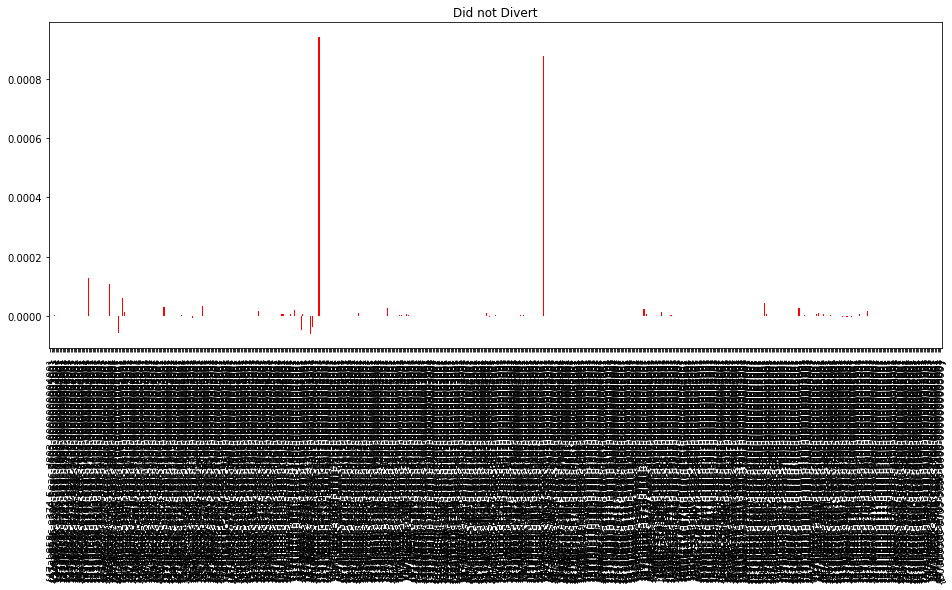

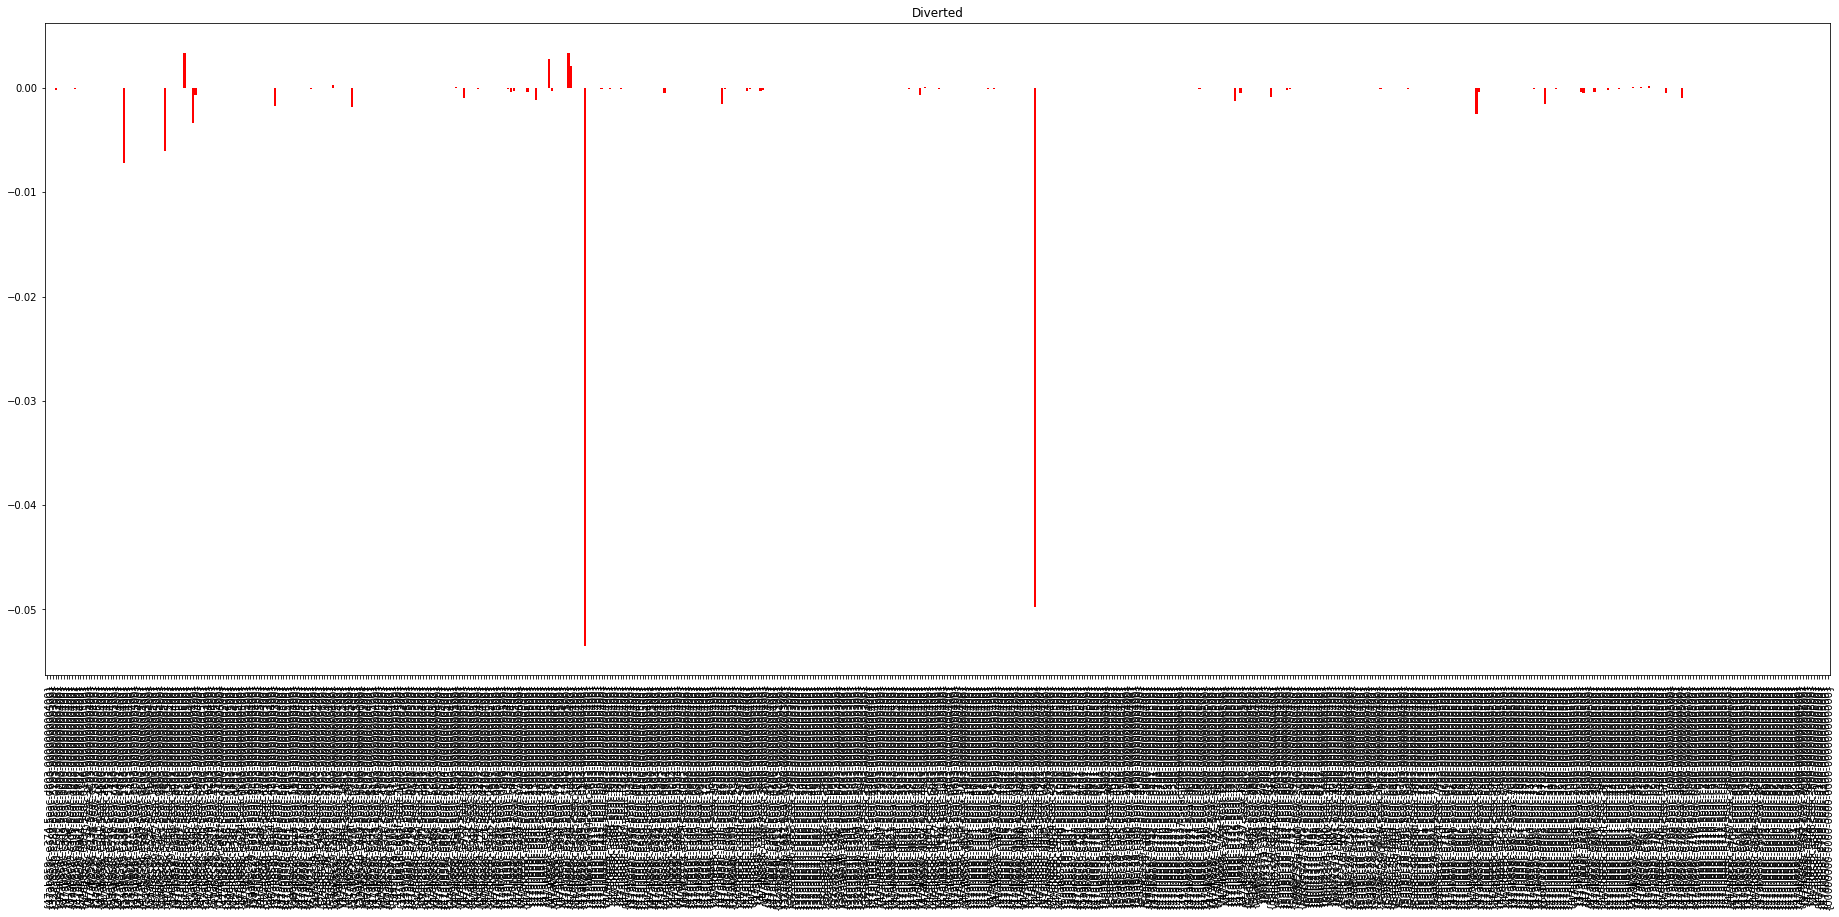

In [41]:
titles = ["Did not Divert", "Diverted"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [32, 12]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

In [42]:
# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

In [43]:
indices = np.argsort(rf.feature_importances_)[::-1]
feature_list = [x.columns[indices[f]] for f in range(x.shape[1])]  #names of features.
ff = np.array(feature_list)

In [44]:
result = class_feature_importance(x, df.TP_Binary, rf.feature_importances_)
print (json.dumps(result,indent=4))

{
    "false": {
        "0": 0.0,
        "1": 0.0,
        "2": 0.0,
        "3": 3.9177660585410375e-06,
        "4": 0.0,
        "5": 0.0,
        "6": 0.0,
        "7": 3.939276128548946e-07,
        "8": 0.0,
        "9": 0.0,
        "10": 1.38989727201737e-06,
        "11": 0.0,
        "12": 0.0,
        "13": 0.0,
        "14": 2.052012862698404e-08,
        "15": 0.0,
        "16": 1.55771671362556e-08,
        "17": 0.0,
        "18": 0.0,
        "19": 0.0,
        "20": 3.126396236227846e-07,
        "21": 0.0,
        "22": 0.0,
        "23": 4.356942208075955e-07,
        "24": 0.0,
        "25": 0.0,
        "26": 4.726886154981887e-08,
        "27": 3.314416801210419e-07,
        "28": 0.0001272097775636684,
        "29": 0.0,
        "30": 0.0,
        "31": 1.2315238077994542e-07,
        "32": 0.0,
        "33": 0.0,
        "34": 0.0,
        "35": 0.0,
        "36": 0.0,
        "37": 0.0,
        "38": 0.0,
        "39": 0.0,
        "40": 0.0,
        "41": 0.

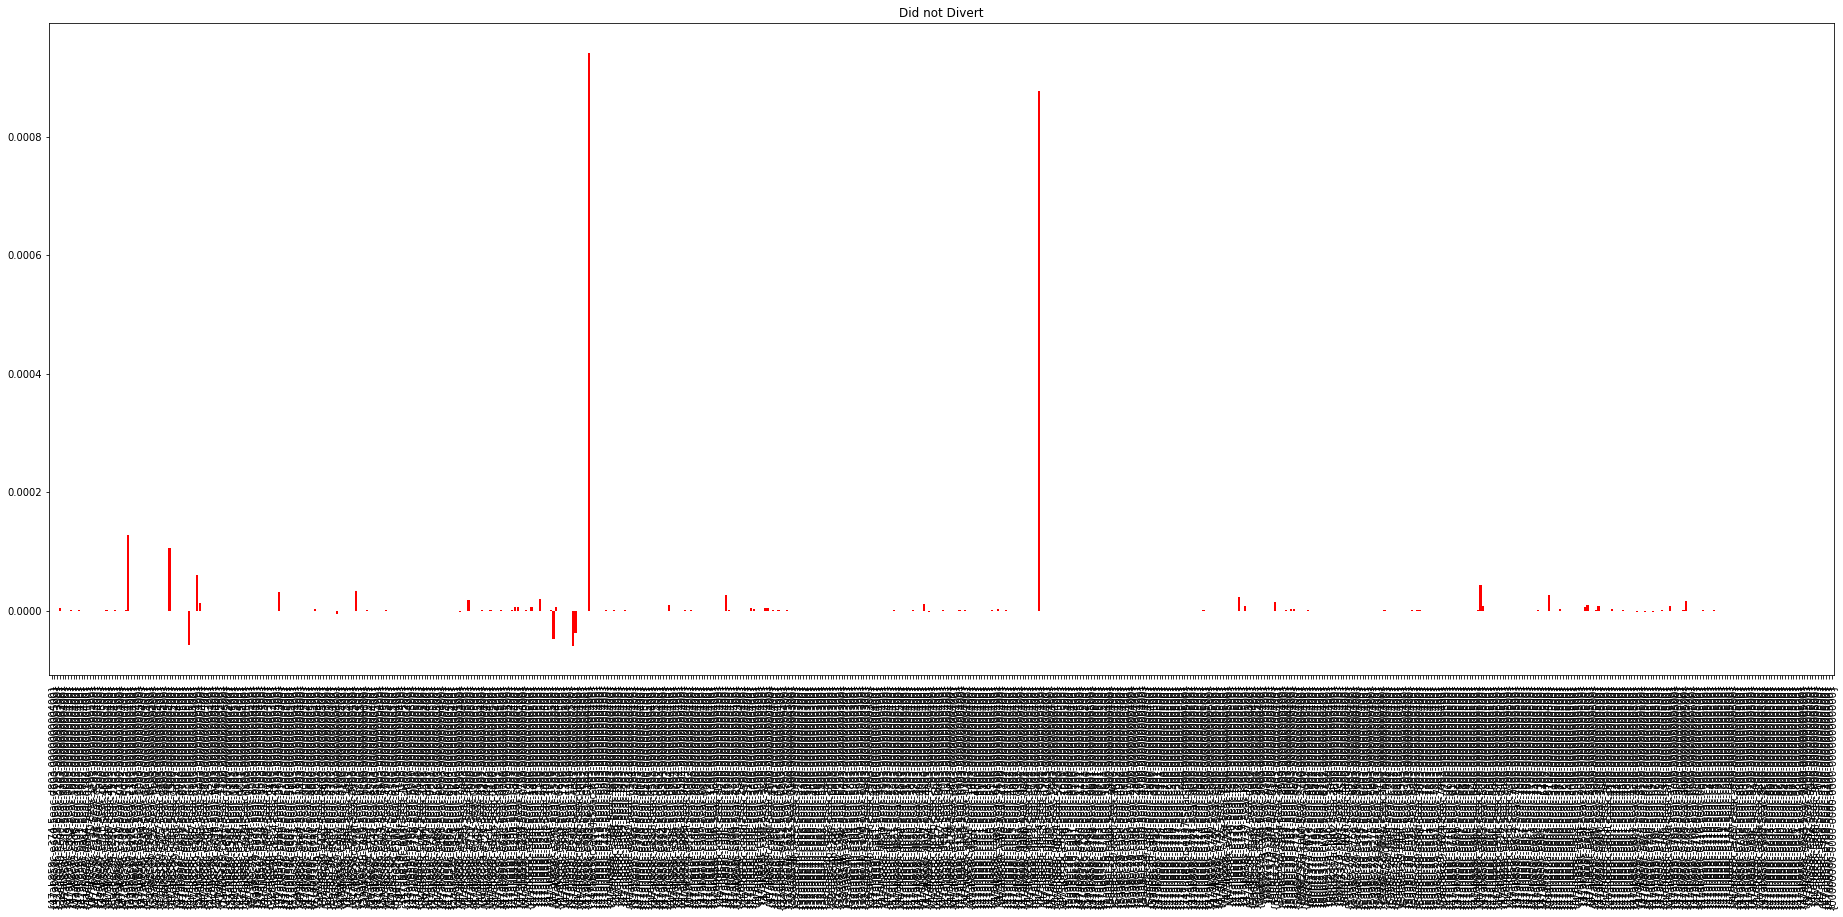

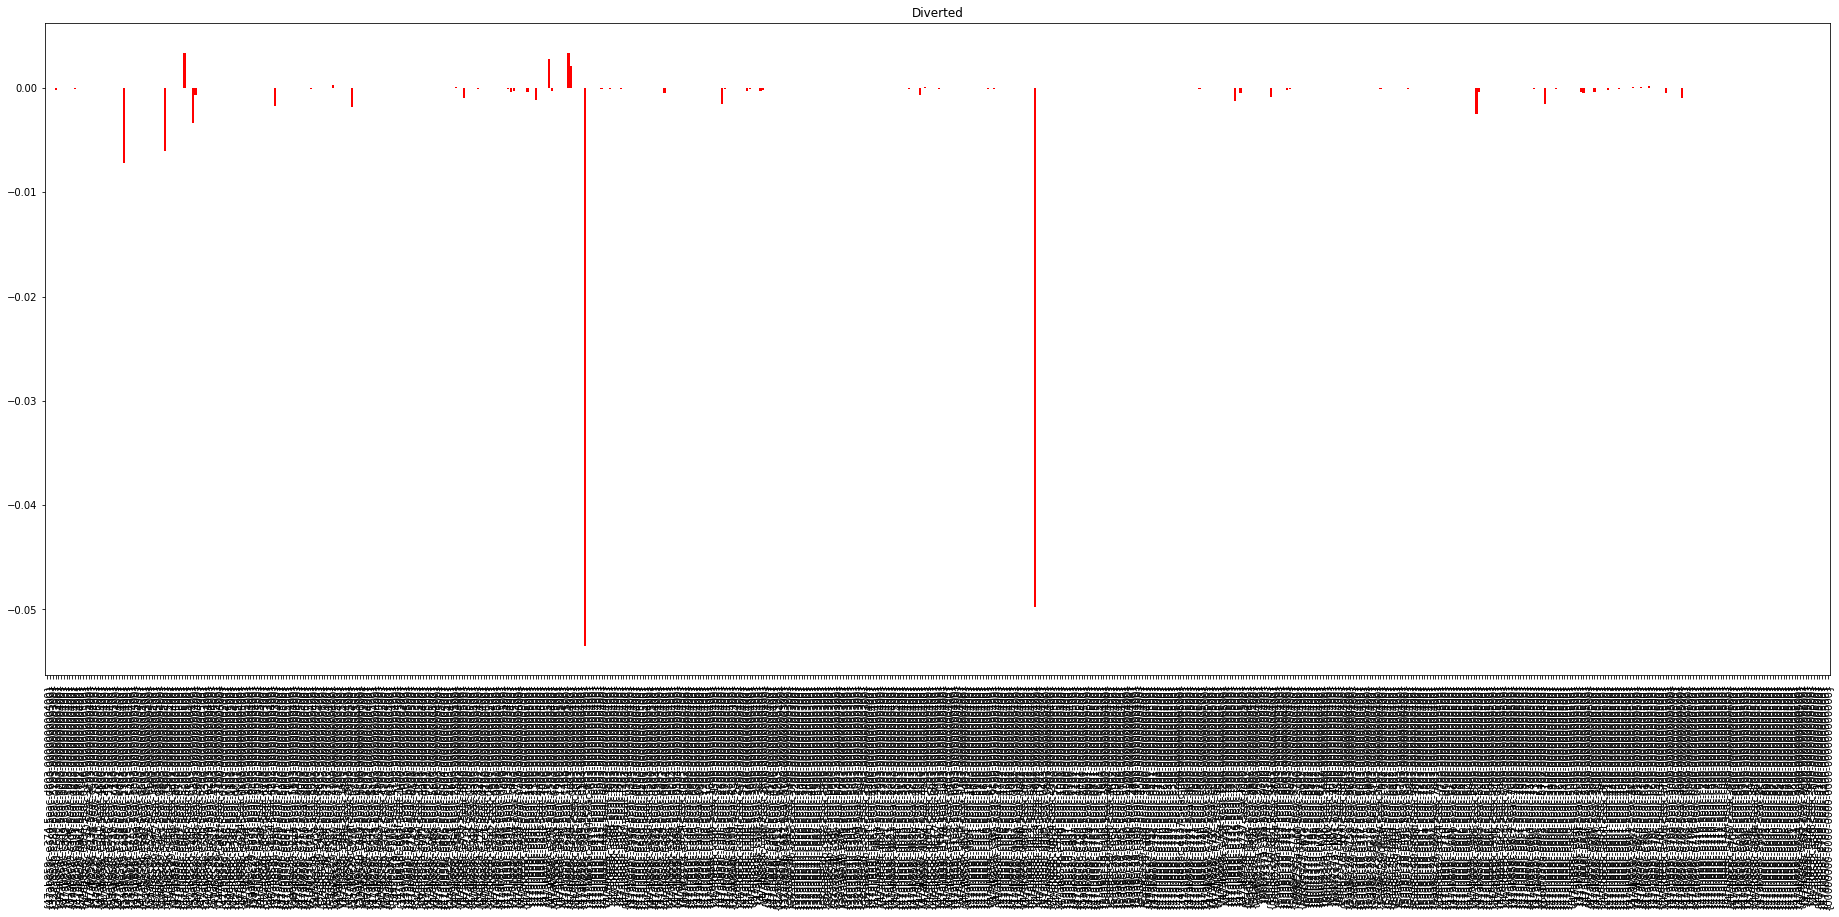

In [45]:
titles = ["Did not Divert", "Diverted"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [32, 12]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

In [48]:
# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            sorted(zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances), key=lambda x: x[1])
        )

    return out

In [49]:
indices = np.argsort(rf.feature_importances_)[::-1]
feature_list = [x.columns[indices[f]] for f in range(x.shape[1])]  #names of features.
ff = np.array(feature_list)

In [50]:
result = class_feature_importance(x, df.TP_Binary, rf.feature_importances_)
print (json.dumps(result,indent=4))

{
    "false": {
        "190": -5.9365071573067905e-05,
        "50": -5.849366809823206e-05,
        "183": -4.822438532561903e-05,
        "191": -3.7796548364699334e-05,
        "104": -5.0572483120842505e-06,
        "584": -2.7775247272706026e-06,
        "581": -2.378669546317091e-06,
        "320": -1.723526318557759e-06,
        "578": -1.6956431350232561e-06,
        "149": -1.5497262102084817e-06,
        "600": -5.789881296605386e-07,
        "195": -3.3565813159602296e-07,
        "151": -2.711354817609123e-07,
        "604": -3.201742319643913e-08,
        "605": -2.036092368520957e-08,
        "593": -1.3354350051783684e-08,
        "597": -8.013260332830038e-09,
        "218": -2.3173908598688746e-09,
        "215": -1.356782625993155e-09,
        "220": -7.611520869616857e-10,
        "0": 0.0,
        "1": 0.0,
        "2": 0.0,
        "4": 0.0,
        "5": 0.0,
        "6": 0.0,
        "8": 0.0,
        "9": 0.0,
        "11": 0.0,
        "12": 0.0,
        "13":

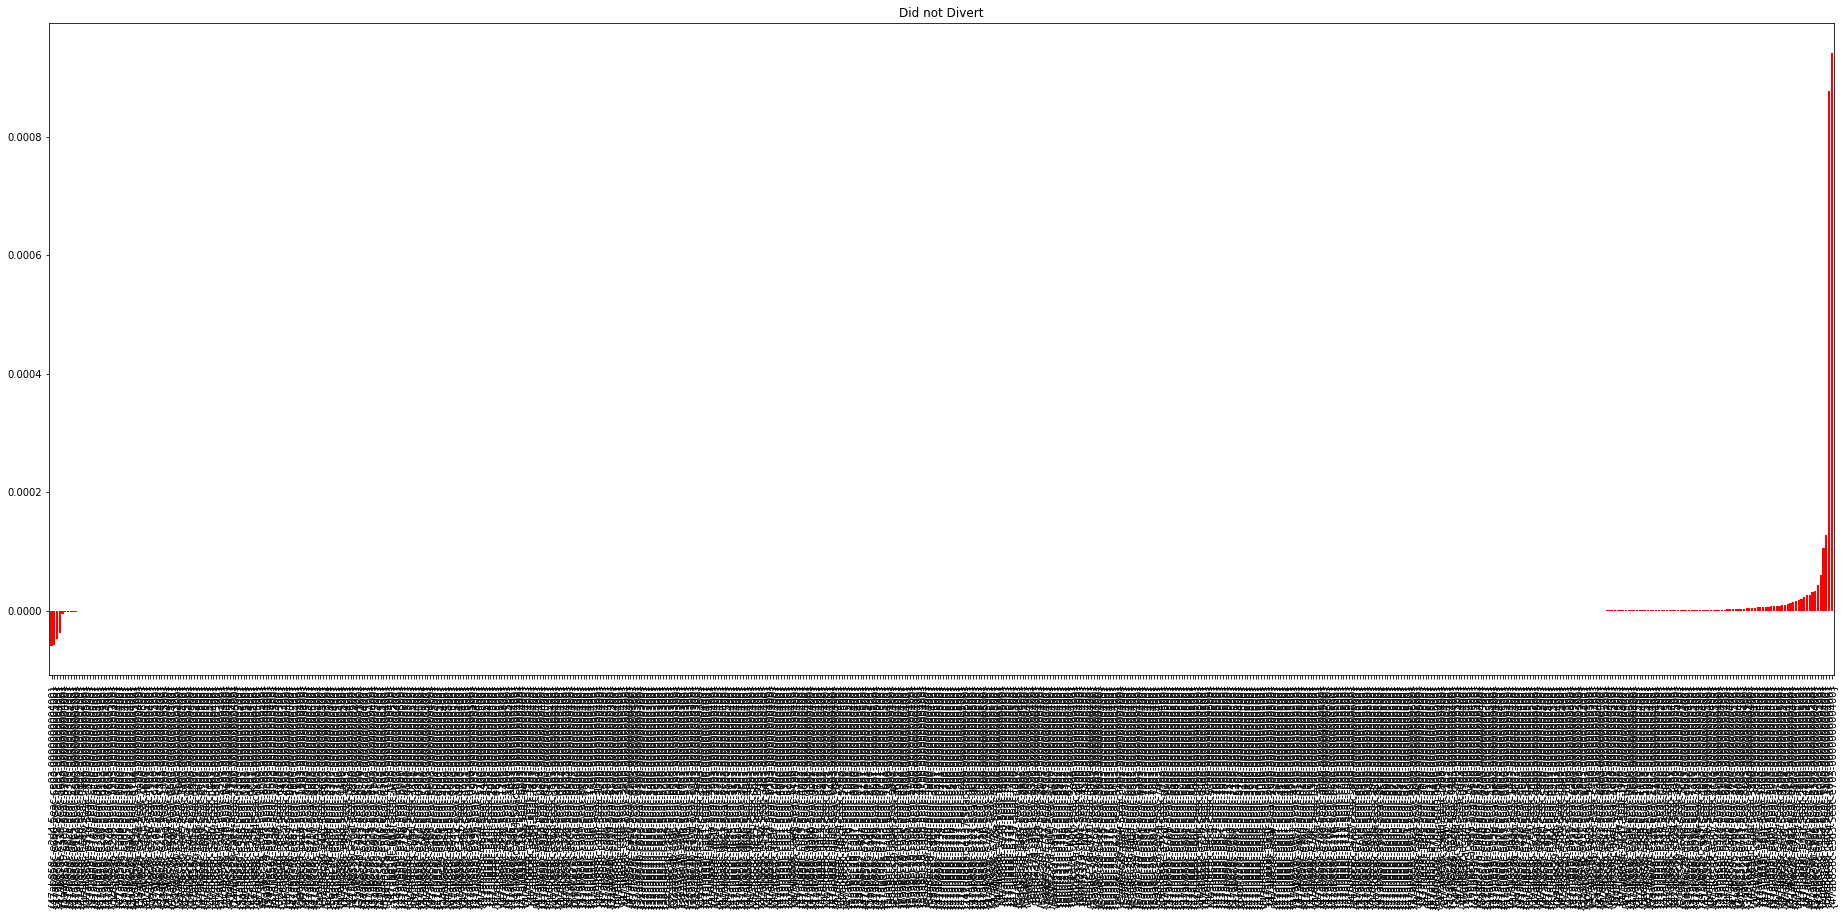

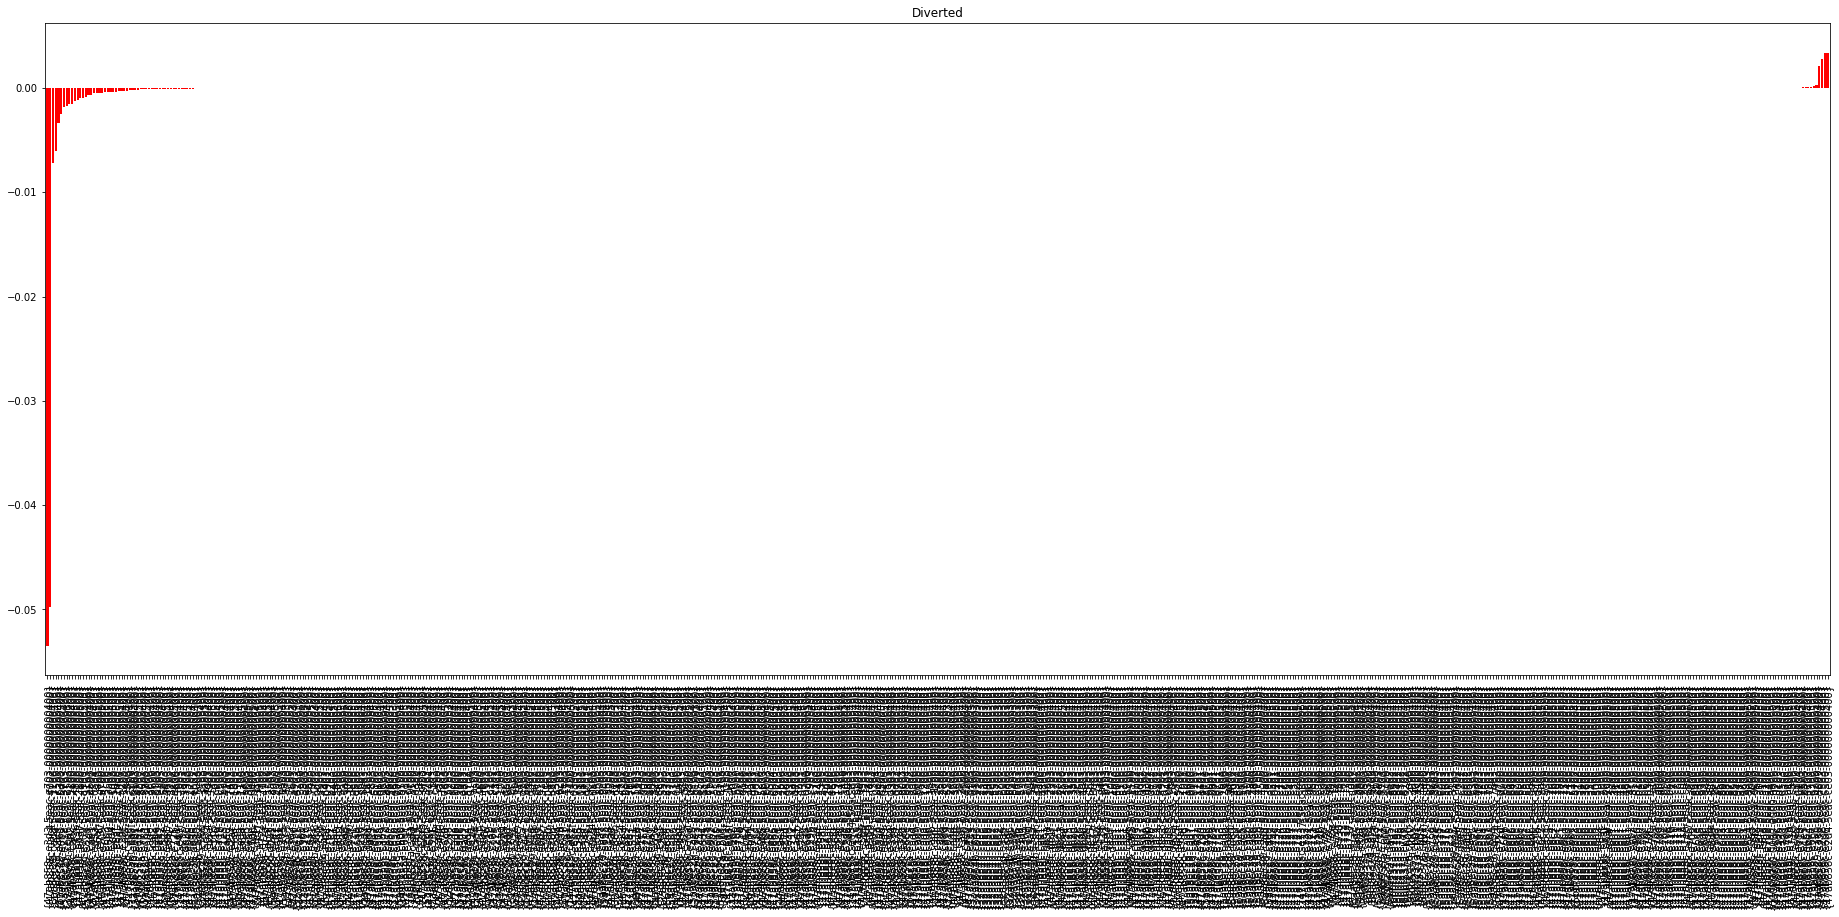

In [51]:
titles = ["Did not Divert", "Diverted"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [32, 12]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

In [67]:
# To get the importance according to each class:
def pos_class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(sorted([[i,j] for i,j in zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances) if j>0] , key=lambda x: x[1], reverse=True))

    return out

In [68]:
result = pos_class_feature_importance(x, df.TP_Binary, rf.feature_importances_)
print (json.dumps(result,indent=4))

{
    "false": {
        "196": 0.0009413680245508025,
        "360": 0.0008762557214380768,
        "28": 0.0001272097775636684,
        "43": 0.00010637833849557072,
        "53": 5.979675730513852e-05,
        "521": 4.3334651862575314e-05,
        "111": 3.26554400023063e-05,
        "83": 3.075422821696449e-05,
        "546": 2.6647361098161627e-05,
        "246": 2.628004836324406e-05,
        "433": 2.2398511659861562e-05,
        "178": 1.9627260017374182e-05,
        "152": 1.7211938793931514e-05,
        "596": 1.6679805857141065e-05,
        "446": 1.452867361243743e-05,
        "54": 1.235611707561863e-05,
        "318": 1.1556927009275953e-05,
        "225": 9.011695639981876e-06,
        "560": 8.749860892683245e-06,
        "435": 8.111828925439303e-06,
        "590": 8.053764660697782e-06,
        "522": 7.240446923780759e-06,
        "564": 7.145797873768585e-06,
        "169": 6.8741880107696596e-06,
        "175": 6.727026898734516e-06,
        "559": 6.3948807557827

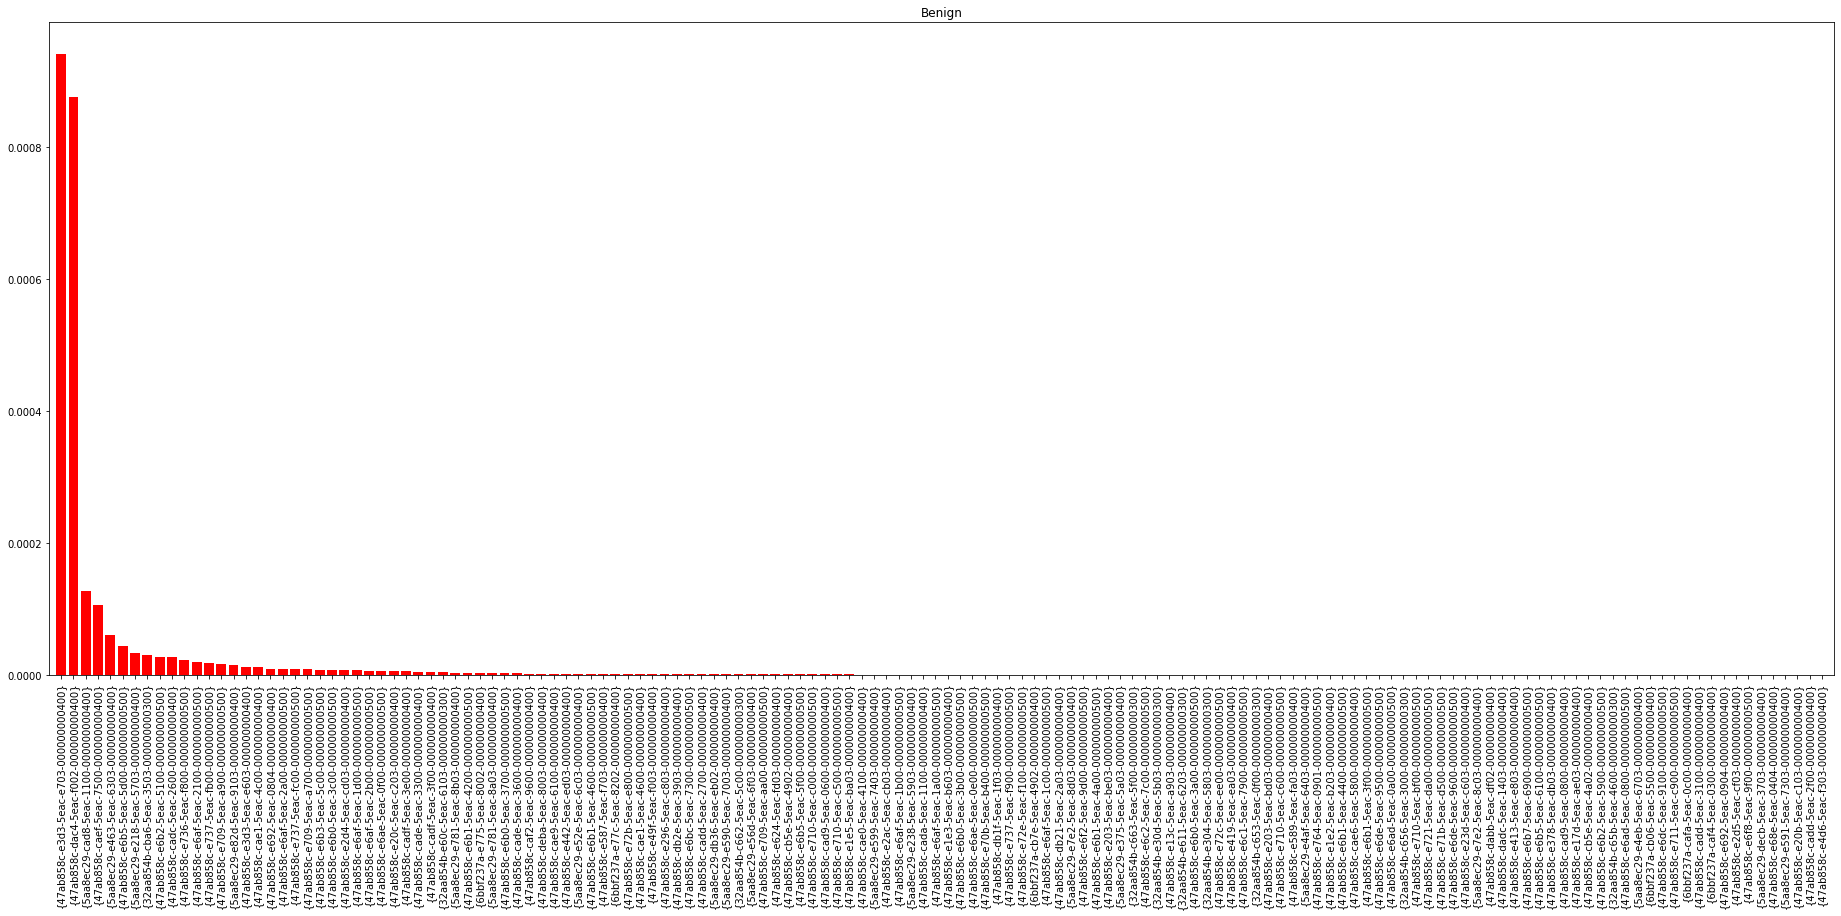

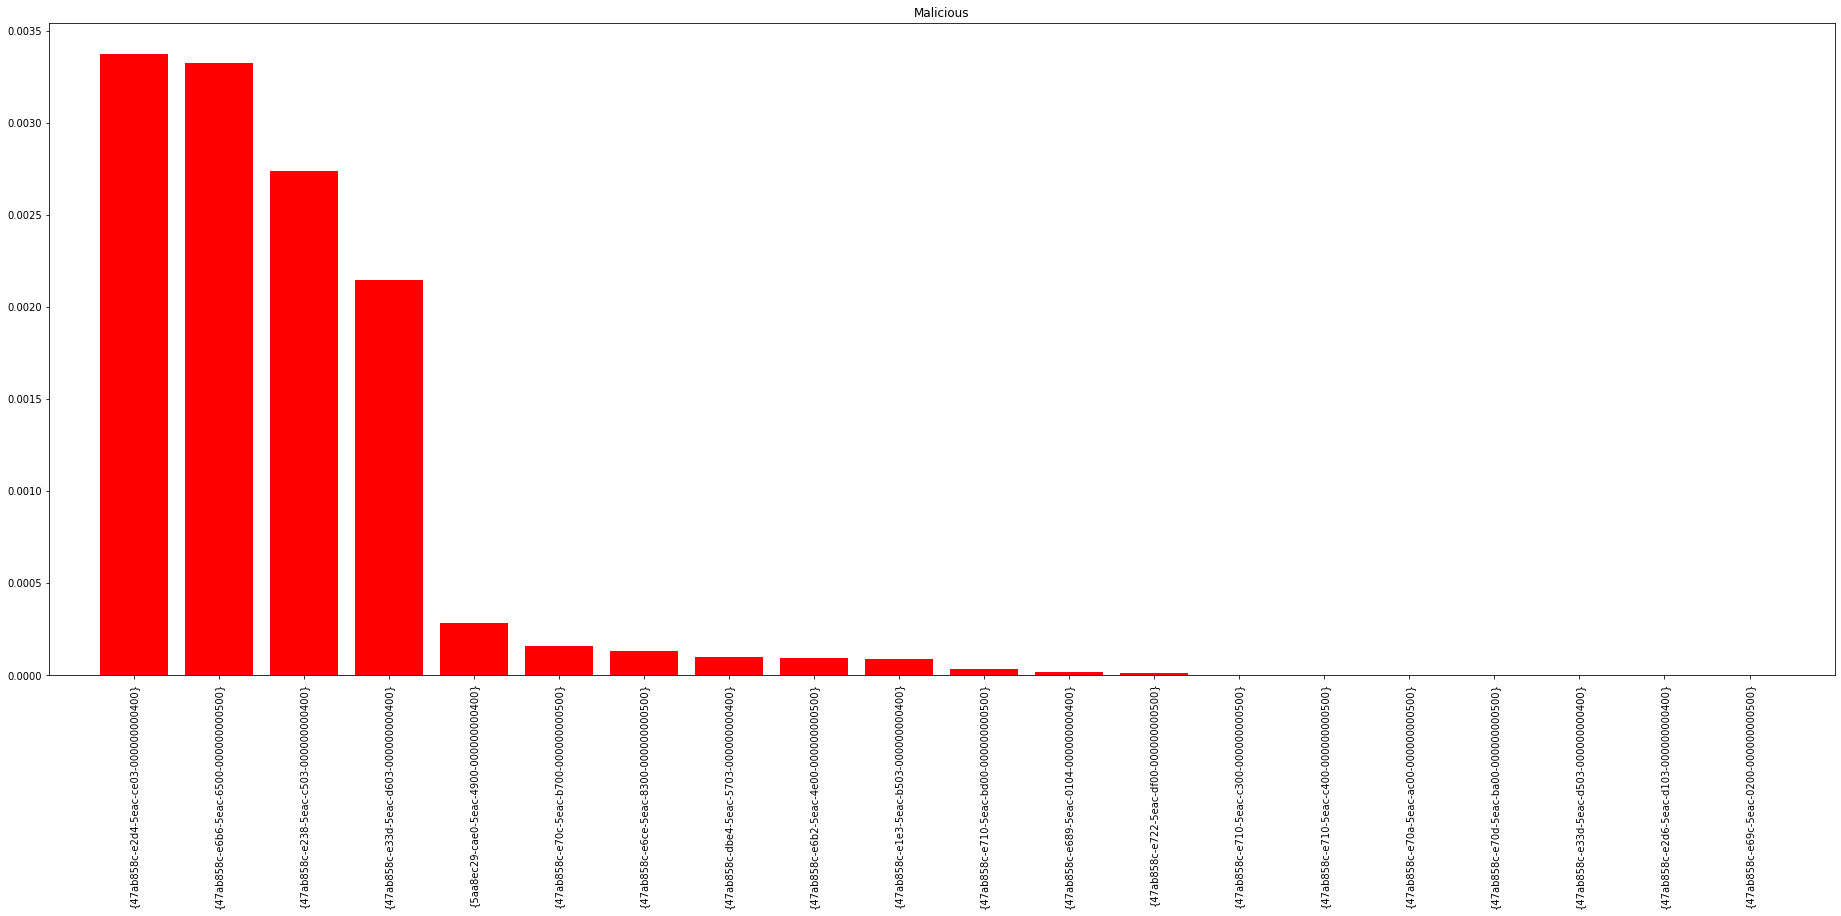

In [72]:
titles = ["Benign", "Malicious"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [32, 12]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

In [104]:
pd.options.display.max_rows = 150
pd_benign = pd.DataFrame(result[False].values(), ff[list(result[False].keys())])

In [105]:
display(pd_benign)

,0
{47ab858c-e3d3-5eac-e703-000000000400},9.413680e-04
{47ab858c-dac4-5eac-f002-000000000400},8.762557e-04
{5aa8ec29-cad8-5eac-1100-000000000400},1.272098e-04
{47ab858c-caef-5eac-7500-000000000400},1.063783e-04
{5aa8ec29-e463-5eac-6303-000000000400},5.979676e-05
{47ab858c-e6b5-5eac-5d00-000000000500},4.333465e-05
{5aa8ec29-e218-5eac-5703-000000000400},3.265544e-05
{32aa854b-cba6-5eac-3503-000000000300},3.075423e-05
{47ab858c-e6b2-5eac-5100-000000000500},2.664736e-05
{47ab858c-cadc-5eac-2600-000000000400},2.628005e-05


In [107]:
pd_mal = pd.DataFrame(result[True].values(), ff[list(result[True].keys())])

In [108]:
pd_mal

,0
{47ab858c-e2d4-5eac-ce03-000000000400},3.372689e-03
{47ab858c-e6b6-5eac-6500-000000000500},3.323182e-03
{47ab858c-e238-5eac-c503-000000000400},2.739757e-03
{47ab858c-e33d-5eac-d603-000000000400},2.147323e-03
{5aa8ec29-cae0-5eac-4900-000000000400},2.873158e-04
{47ab858c-e70c-5eac-b700-000000000500},1.577986e-04
{47ab858c-e6ce-5eac-8300-000000000500},1.351386e-04
{47ab858c-dbe4-5eac-5703-000000000400},9.791815e-05
{47ab858c-e6b2-5eac-4e00-000000000500},9.633403e-05
{47ab858c-e1e3-5eac-b503-000000000400},8.804410e-05
